In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
import os


In [2]:
def tanh_model(xs, x0, delta, me):
    return np.abs(me*np.tanh(np.pi*(xs-x0)/delta))

def fit_domain_wall(xs, magzs):
    (fit_x0, fit_delta, fit_me), res = scipy.optimize.curve_fit(tanh_model, xs, magzs, p0=[240, 30, 1])
    return (fit_x0, fit_delta, fit_me)



In [3]:
interface_width_fixup = 1.7011094153574284 - (413.963767 - 402.532814) # actual interface width vs interface width in ASD calculation
print(interface_width_fixup)
def fix_interface_width(profile):
    zmin = np.min(profile[:,0])
    zmax = np.max(profile[:,0])
    zmiddle = (zmax + zmin)/2
    profile[profile[:,0] > zmiddle,0] += interface_width_fixup
    return profile


-9.729843584642616


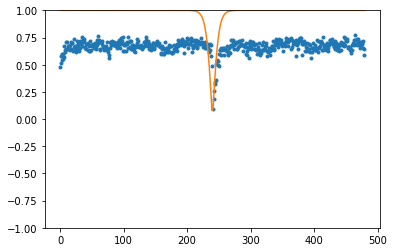

MovieWriter ffmpeg unavailable; using Pillow instead.


domain wall width [nm]:  2.861417417616038
domain wall width [nm]:  6.604635529606031
domain wall width [nm]:  9.59446014529365
domain wall width [nm]:  5.706294347484084
domain wall width [nm]:  11.796319472657139
domain wall width [nm]:  13.374586477767524
domain wall width [nm]:  11.495211668372287
domain wall width [nm]:  7.257572073203444
domain wall width [nm]:  8.501391520208486
domain wall width [nm]:  11.254152235963689
domain wall width [nm]:  14.59666684779885
domain wall width [nm]:  20.38158134654915
domain wall width [nm]:  24.159493533823493
domain wall width [nm]:  20.742393231910988
domain wall width [nm]:  24.017434953304132
domain wall width [nm]:  19.072147857145417
domain wall width [nm]:  14.309411667691682
domain wall width [nm]:  17.591212954999165
domain wall width [nm]:  20.710702785371325
domain wall width [nm]:  25.237728972166966
domain wall width [nm]:  22.691548973882135
domain wall width [nm]:  20.33902697866502
domain wall width [nm]:  20.66476876617805

In [6]:
from matplotlib.animation import FuncAnimation

# output_dir = 'scratch/CoRuCo/temp_sweep/0K_nowall/output'
# output_dir = 'scratch/CoRuCo/temp_sweep/Ru1_0K/output/'
output_dir = 'scratch/CoRuCo/temp_sweep/no3_nowall/1000/output'

prof = np.genfromtxt(os.path.join(output_dir, "profile.out0"))
prof = fix_interface_width(prof)

fig, ax = plt.subplots()
ln, = ax.plot(prof[:,0], prof[:,1], linestyle='', marker='.')

fit_xs = np.array(sorted(prof[:,0]))
ln_fit, = ax.plot(fit_xs, tanh_model(fit_xs, 240, 30, 1))
ax.set_ylim(-1, 1)

scale = 2.47e-1


widths = []

def init():
    return ln,

def update(i):
    prof = np.genfromtxt(os.path.join(output_dir, "profile.out{}".format(i)))
    prof = fix_interface_width(prof)
    # spins = np.genfromtxt(os.path.join(expdir, "lattice.out{}".format(i)))
    # xs = pos[:,0]
    # ys = spins[:,2]
    # bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(xs, ys, bins=200)
    # scale = 2.47e-1
    x0, delta, ms = fit_domain_wall(prof[:,0], prof[:,1])
    print("domain wall width [nm]: ", scale*delta)
    widths.append(scale*delta)
    ln.set_data(prof[:,0], prof[:,1])

    ln_fit.set_data(fit_xs, tanh_model(fit_xs, x0, delta, ms))

    return ln,

n = 100
ani = FuncAnimation(fig, update, frames=n,
                    init_func=init, blit=True)
plt.show()
ani.save("animation.gif")
# spins = np.genfromtxt(os.path.join(expdir, "lattice.out{}".format(n-1)))
# xs = pos[:,0]
# ys = spins[:,2]
# x0, delta, ms = fit_domain_wall(xs, ys)
# print("domain wall width [nm]: ", scale*delta)


In [ ]:
i = 0
prof = np.genfromtxt(os.path.join(output_dir, "profile.out{}".format(i)))
np.average(prof[:,1])


In [ ]:
scaled_xs = prof[:,0]*scale
plt.figure(figsize=(5,3), dpi=400)
plt.scatter(scaled_xs, prof[:,1])
plt.ylim(-1, 1)
# plt.xlim(40,80)
plt.xlabel("z [nm]")
plt.ylabel("M/|M|")
plt.title("magnetization profile - 1 Ru layer, 0 K")
